# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing dataset

In [2]:
data=pd.read_csv("insurance_heartcost.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Preprocessing

In [4]:
#encoding the sex data
from sklearn import preprocessing 
l=preprocessing.LabelEncoder()
sex_encoded=l.fit_transform(data['sex'])
data['sex']=sex_encoded

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [8]:
smoker_encoded=l.fit_transform(data['smoker'])
data['smoker']=smoker_encoded
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 62.8+ KB


In [9]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


# Assigning dependent and independent variable


In [18]:
x=data.iloc[:,:5]

In [19]:
x.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [24]:
y=data['charges']

In [25]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Splitting the Dataset into Training and Testing set

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# fitting the Model

In [27]:
from sklearn.linear_model import LinearRegression
hcr=LinearRegression()
hcr.fit(x_train,y_train)

LinearRegression()

In [38]:
y_predict=hcr.predict(x_test)
y_predict

array([11472.23618644,  9958.50125569, 37657.06917237, 15949.13223617,
        6885.72312017,  3528.88810655,  1031.86224676, 14181.1024054 ,
        8847.14792524,  7275.30131109,  4216.86216451, 10190.14526672,
        9097.46039634,  4255.14691858, 27430.50340855, 11282.58288365,
       11177.22736522,  5504.64625133,  8030.81149341, 26327.41490839,
       33367.35431038, 14177.00561427, 11261.11883838, 32413.15484705,
        4414.81928993,  8606.98618122,   712.30206629, 10258.50678538,
        4198.66143865, 10231.92533963,  8874.73800132, 40207.90493832,
       15892.29406482, 14055.58336707, 24136.79051345,  4643.98226168,
       12953.8618379 , 30694.2595505 , 33135.3543329 ,  3790.06798605,
        3598.22643981,  4347.64393443, 29853.09596525, 39076.04912317,
       27832.89698787,  4787.97369821, 11176.63306955,  7646.91121556,
        3192.01904016, 10805.99433047,  5065.92896438,  3216.91828843,
       33153.3686017 , 37813.274525  , 16350.82043262,  6496.18828402,
      

In [39]:
print(hcr.score(x_test,y_test))

0.7894790349867009


# Visualization

Text(0, 0.5, 'y_predict')

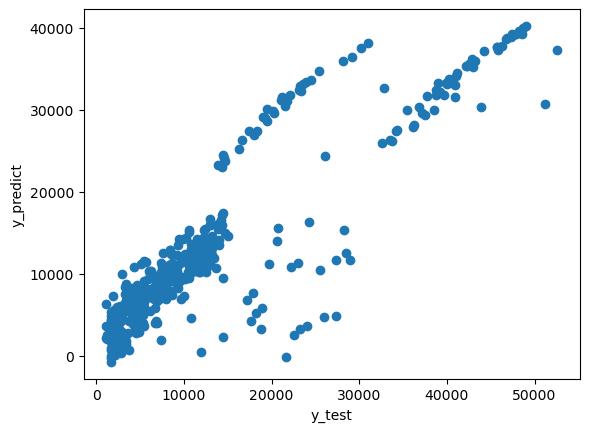

In [40]:
plt.scatter(y_test,y_predict)
plt.xlabel('y_test')
plt.ylabel('y_predict')

# Predicting the new charge


In [41]:
y_predict=hcr.predict([[23,0,34.67,0,1]])
y_predict

C:\Users\lavan\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28421.98944725])